In [22]:
import time

import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
%ls spectra/X0319

X0319_N_O_E.fits            X0319_U_O_E.fits      X0319_V_O_E.fits
X0319_N_O_E_TAC_final.fits  X0319_U_O_E_TAC.fits  X0319_V_O_E_TAC_final.fits
X0319_N_O_E_TRA.fits        X0319_U_O_E_TRA.fits  X0319_V_O_E_TRA.fits


In [3]:
obs_flux, obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E.fits')
tel_flux, tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E_TRA.fits')

In [4]:
def average_of_middle_elements(flux, size=20):
    mid_idx = int(len(flux) / 2)
    print(mid_idx)
    mid_values = flux[mid_idx - int(size/2):mid_idx + int(size/2) + 1]
    
    return np.mean(mid_values)

In [5]:
obs_avg_flux = average_of_middle_elements(obs_flux)

16211


In [6]:
obs_normalized_flux = obs_flux / obs_avg_flux

Distance: 6062.245018723763
Are all warp path indices aligned? False


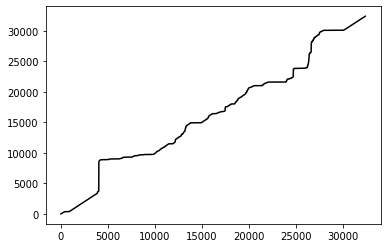

Elapsed time in seconds: 1.056699275970459


In [7]:
start = time.time()

x0319_v_dtw_path = utils.fast_dtw_on_stellar_spectra(tel_flux, obs_normalized_flux)

end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

In [8]:
x0319_v_aligned_tel = utils.align_sequence_dtw_path(x0319_v_dtw_path, tel_flux)

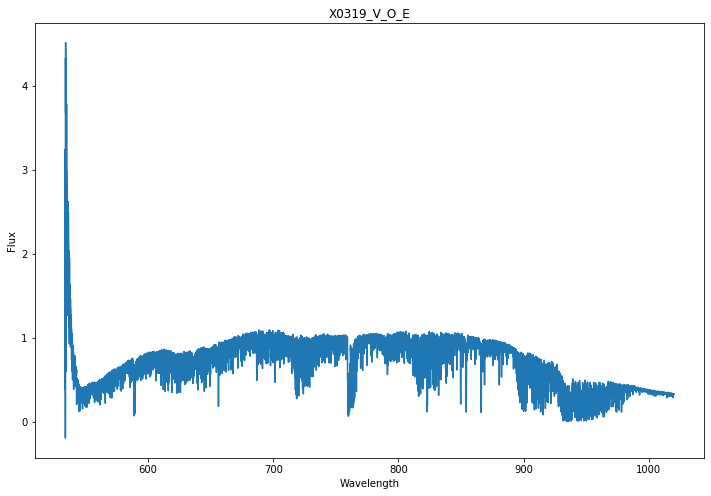

In [9]:
utils.plot_spectrum(obs_normalized_flux, obs_wl, 'spectra/X0319/X0319_V_O_E.fits')

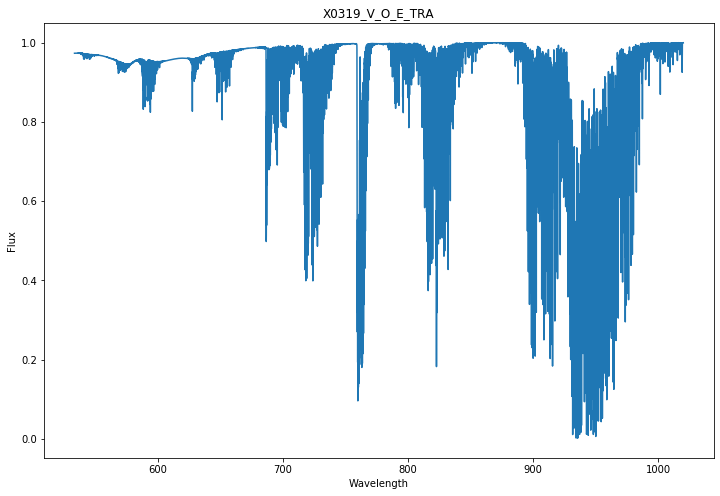

In [10]:
utils.plot_spectrum(tel_flux, tel_wl, 'spectra/X0319/X0319_V_O_E_TRA.fits')

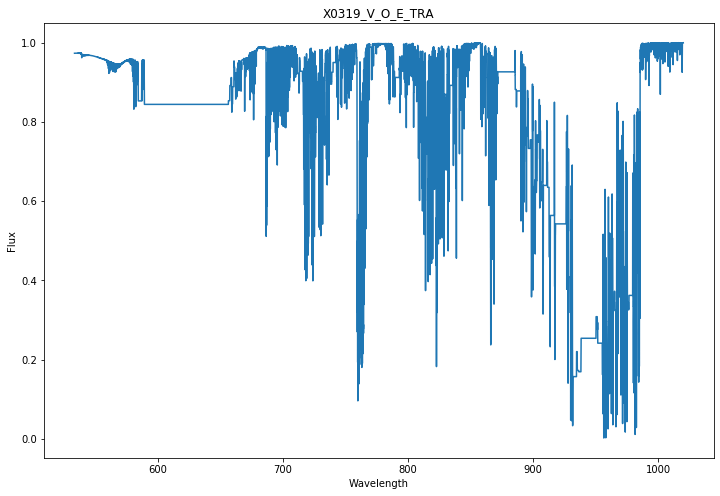

In [11]:
utils.plot_spectrum(x0319_v_aligned_tel, tel_wl, 'spectra/X0319/X0319_V_O_E_TRA.fits')

In [15]:
corr_flux, corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0319/X0319_V_O_E_TAC_final.fits')
corr_avg_flux = average_of_middle_elements(corr_flux)
corr_normalized_flux = corr_flux / corr_avg_flux

16211


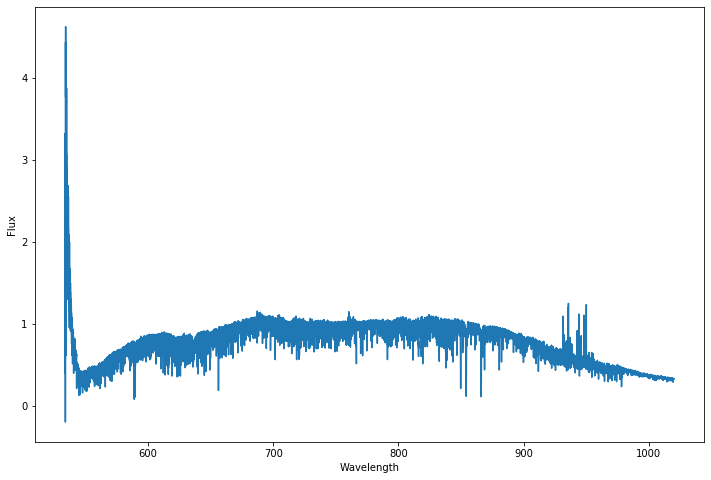

In [16]:
utils.plot_spectrum(corr_normalized_flux, corr_wl)

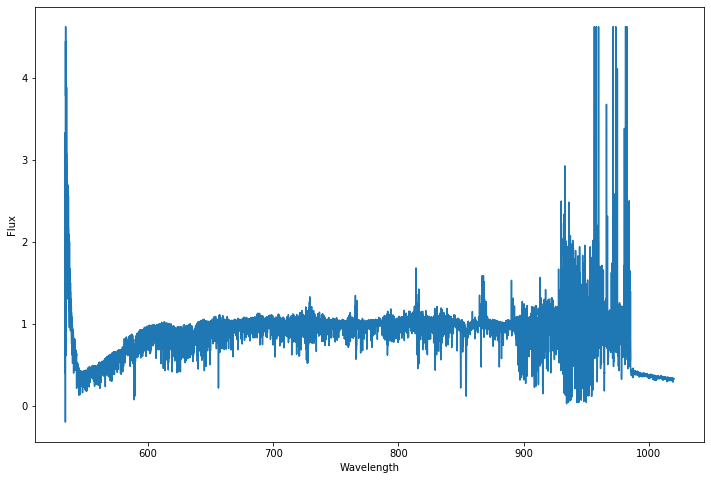

In [19]:
divided_flux = obs_normalized_flux / x0319_v_aligned_tel
clipped_divided_flux = np.clip(divided_flux, corr_normalized_flux.min(), corr_normalized_flux.max())
utils.plot_spectrum(clipped_divided_flux, obs_wl)

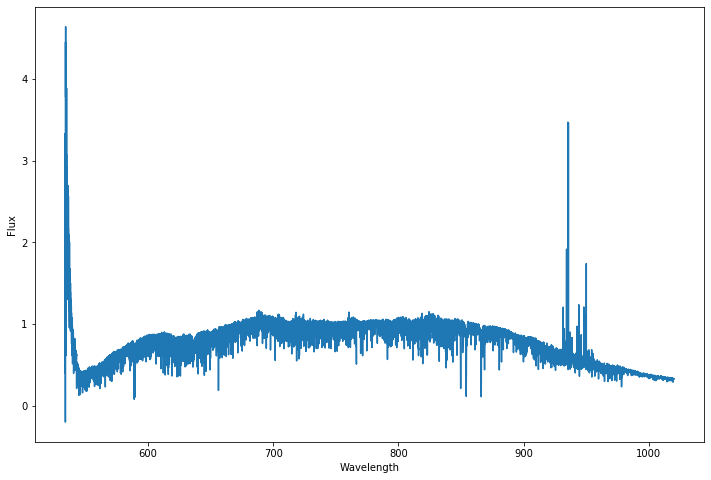

In [28]:
divided_flux_true = obs_normalized_flux / tel_flux
# clipped_divided_flux = np.clip(divided_flux, corr_normalized_flux.min(), corr_normalized_flux.max())
utils.plot_spectrum(divided_flux_true, obs_wl)

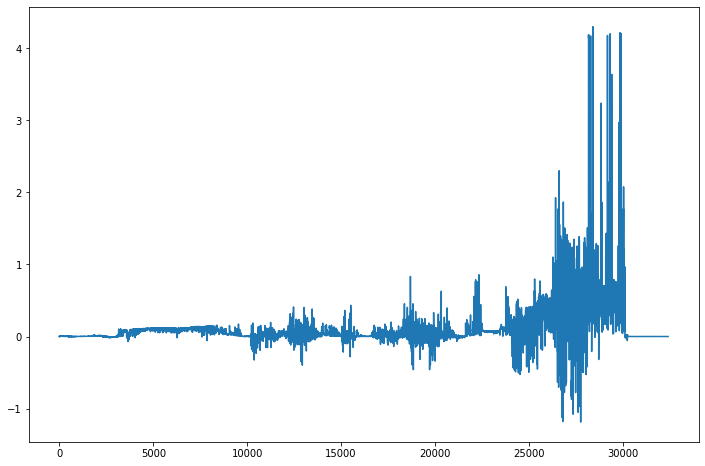

In [29]:
plt.plot(clipped_divided_flux - corr_normalized_flux)

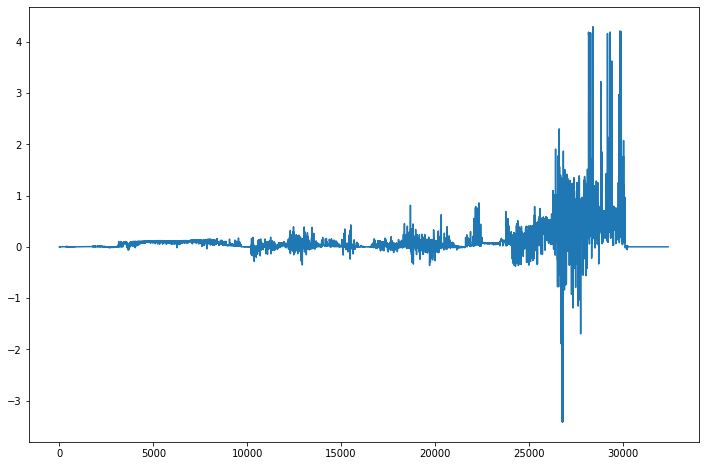

In [30]:
plt.plot(clipped_divided_flux - divided_flux_true)